# Assignment 2

Authors: Akos Engelmann, Gergely Parady, Ipek Cakin, Simon Jasansky

Types:
1. Paper (<http://MAGexample.org/type/paper>)
2. Author (<http://MAGexample.org/type/author>)
3. Domain (<http://MAGexample.org/type/domain>)
4. Affiliation (<http://MAGexample.org/type/affiliation>)
5. Conference (<http://MAGexample.org/type/conference>)

Properties
1. memberOf <http://www.w3.org/ns/org#memberOf> (author memberOf affiliation)
2. hascreator <http://purl.org/dc/terms/creator> (paper creator author)
3. appearsInConferenceSeries <https://makg.org/property/appearsInConferenceSeries>
(paper appearsInConferenceSeries conference)
4. hasDiscipline <http://purl.org/spar/fabio/hasDiscipline> (paper hasDiscipline domain)
5. hasCoauthor <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> (author coauthor
author)
6. cites <http://purl.org/spar/cito/cites> (paper cites paper)
7. a <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>

# Task 1

In the first task, we are supposed to define rules for relations between subjects and objects. 

In [1]:
# read the graph so that we can then test the queries
import pandas as pd
import numpy as np
from rdflib import URIRef, BNode, Literal, Namespace
from rdflib.namespace import XSD, RDF, RDFS
from rdflib import Graph
from urllib.parse import quote

In [23]:
g = Graph()
g.parse("train.nt", format="nt")
output = g.serialize(format='ttl')
g.serialize("train.ttl")
print(output[0:1000])

@prefix ns1: <http://purl.org/spar/fabio/> .
@prefix ns2: <http://lsdis.cs.uga.edu/projects/semdis/opus#> .
@prefix ns3: <https://makg.org/property/> .
@prefix ns4: <http://purl.org/dc/terms/> .
@prefix ns5: <http://purl.org/spar/cito/> .
@prefix ns6: <http://www.w3.org/ns/org#> .

<http://MAGexample.org/00114AFB> a <http://MAGexample.org/type/paper> ;
    ns4:creator <http://MAGexample.org/244AB0BE>,
        <http://MAGexample.org/7111FA18> ;
    ns1:hasDiscipline <http://MAGexample.org/093D9A21> .

<http://MAGexample.org/002DBDF2> a <http://MAGexample.org/type/paper> ;
    ns4:creator <http://MAGexample.org/7DD7119D> ;
    ns1:hasDiscipline <http://MAGexample.org/02235158>,
        <http://MAGexample.org/0850A3C4>,
        <http://MAGexample.org/089D907D> ;
    ns3:appearsInConferenceSeries <http://MAGexample.org/46A05BB0> .

<http://MAGexample.org/006CACBF> a <http://MAGexample.org/type/author> ;
    ns6:memberOf <http://MAGexample.org/4F9B5176> .

<http://MAGexample.org/00854807> a

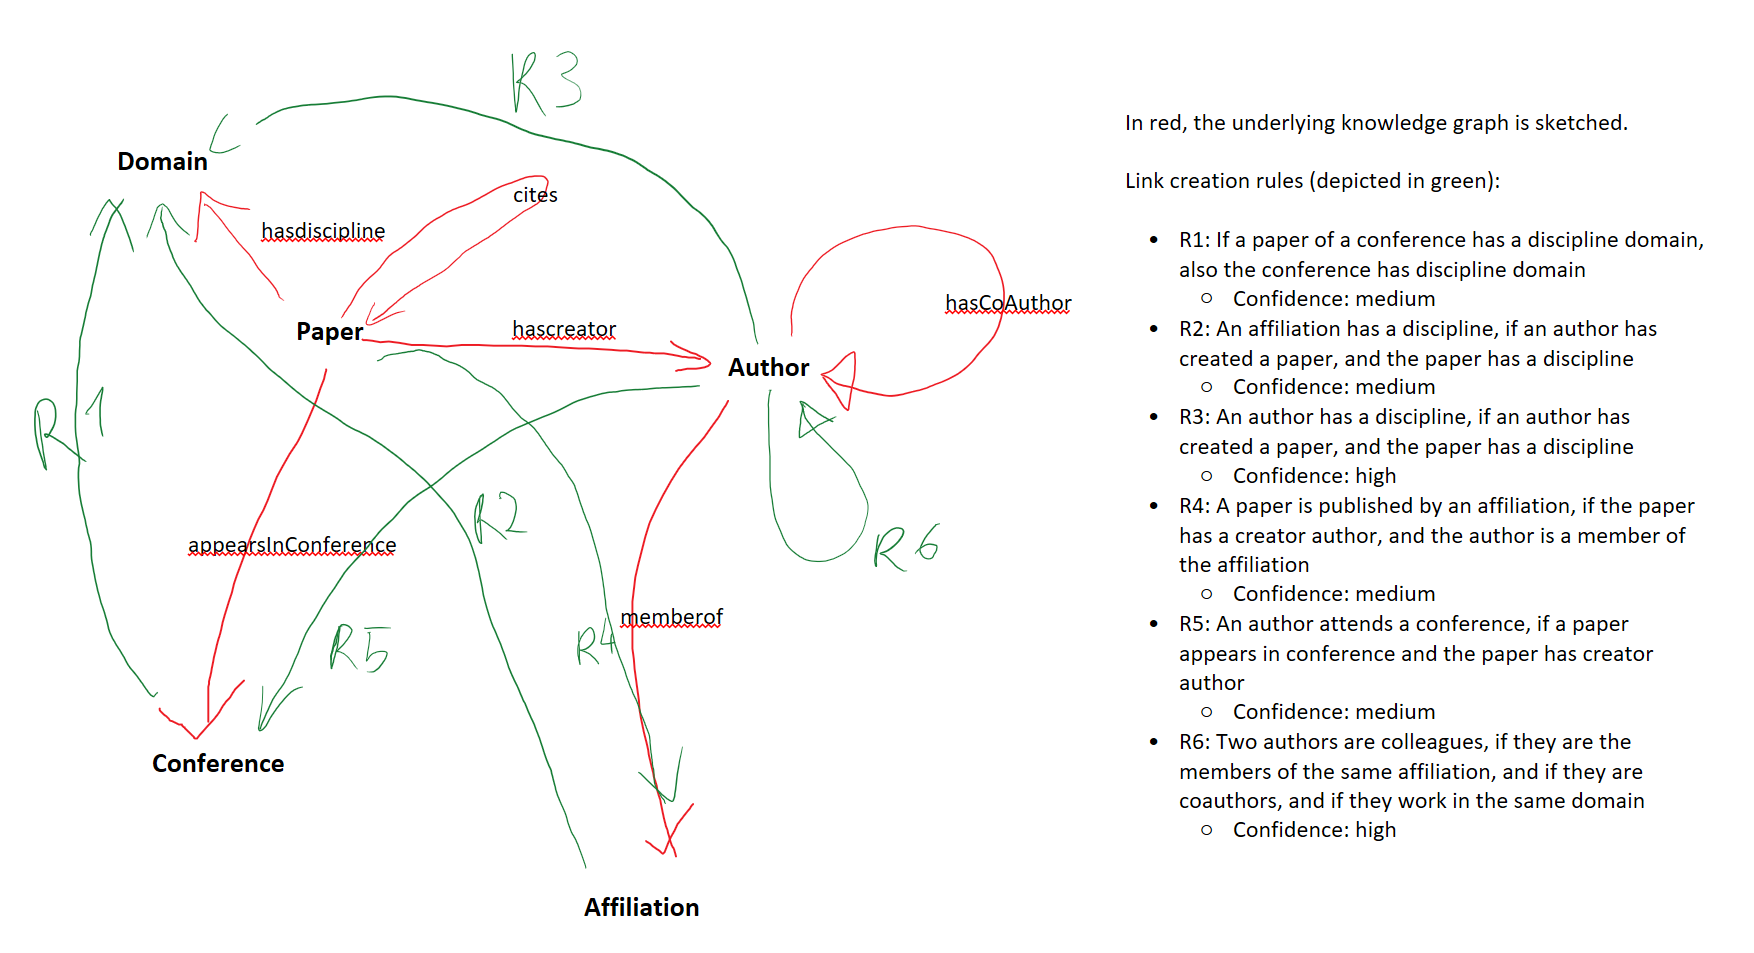

Before and after every rule, we determined the confidence by calculating support and body coverage (without PCA Assumption)

## 1. Rule
R1: If a paper that appears in a conference has a domain, also the conference has this domain

Quality: medium. Reason for quality: it could be that the domain of a paper is not the main domain of the conference, but its just somehow related.

Horn Rule:
 
:conferenceA hasDiscipline :domainX <= :somepaper appearsInConferenceSeries :conferenceA, :somepaper hasDiscipline :domainX

In [ ]:
support_query = """
SELECT (COUNT(*) AS ?cnt) {
    SELECT DISTINCT ?conferenceA ?domainX
    WHERE {
        ?somepaper <https://makg.org/property/appearsInConferenceSeries> ?conferenceA .
        ?somepaper <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
        ?conferenceA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
    }
}
"""

qres = g.query(support_query)
for row in qres :
    support = int(row.cnt)

bodycoverage_query = """
SELECT (COUNT(*) AS ?cnt) {
    SELECT DISTINCT ?conferenceA ?domainX
    WHERE {
        ?somepaper <https://makg.org/property/appearsInConferenceSeries> ?conferenceA .
        ?somepaper <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
    }
}
"""

qres = g.query(bodycoverage_query)
for row in qres :
    bodycoveragePCA = int(row.cnt)

print(f"Support: {support}; Body coverage PCA: {bodycoveragePCA}, Confidence: {support / bodycoveragePCA}")

Support: 0; Body coverage PCA: 5151, Confidence PCA: 0.0


In [42]:
query1 = """
INSERT {
    ?conferenceA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
} 
WHERE {
    ?somepaper <https://makg.org/property/appearsInConferenceSeries> ?conferenceA .
    ?somepaper <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query1)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 89253 triples before insertion
The graph contains 94404 triples after insertion
That means 5151 triples were inserted


In [43]:
support_query = """
SELECT (COUNT(*) AS ?cnt) {
    SELECT DISTINCT ?conferenceA ?domainX
    WHERE {
        ?somepaper <https://makg.org/property/appearsInConferenceSeries> ?conferenceA .
        ?somepaper <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
        ?conferenceA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
    }
}
"""

qres = g.query(support_query)
for row in qres :
    support = int(row.cnt)

bodycoverage_query = """
SELECT (COUNT(*) AS ?cnt) {
    SELECT DISTINCT ?conferenceA ?domainX
    WHERE {
        ?somepaper <https://makg.org/property/appearsInConferenceSeries> ?conferenceA .
        ?somepaper <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
    }
}
"""

qres = g.query(bodycoverage_query)
for row in qres :
    bodycoveragePCA = int(row.cnt)

print(f"Support: {support}; Body coverage PCA: {bodycoveragePCA}, Confidence: {support / bodycoveragePCA}")

Support: 5151; Body coverage PCA: 5151, Confidence: 1.0


## 2. Rule

R2: An affiliation has a discipline, if an author has created a paper, and the paper has a discipline

Quality: medium. Reason for quality: it could be that the domain of a paper is not the main domain of the affiliation (university), but its just somehow related.

Horn Rule

:affiliationQ hasDiscipline: domainX <= paperA hascreator: authorA, paperA hasDiscipline: domainX, authorA memberOf: affiliationQ

In [28]:
query2 = """
INSERT {
    ?affiliationQ <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
}
WHERE {
    ?paperA <http://purl.org/dc/terms/creator> ?authorA .
    ?paperA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
    ?authorA <http://www.w3.org/ns/org#memberOf> ?affiliationQ .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query2)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 94404 triples before insertion
The graph contains 113219 triples after insertion
That means 18815 triples were inserted


## 3. Rule

R3: An author has a discipline, if an author has created a paper, and the paper has a discipline

Quality: High. Reason for quality: it could be that the domain of a paper is not the main domain of the author, but the author just supervised the paper or only gave comments or improvement points to the main authors of the paper but still appears as an author. 

Horn Rule
:authorA hasDiscipline domainX <= :paperA hasDiscipline domainX, :paperA hascreator :authorA

In [29]:
query3 = """
INSERT {
  ?authorA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
}
WHERE {
  ?paperA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
  ?paperA <http://purl.org/dc/terms/creator> ?authorA .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query3)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 113219 triples before insertion
The graph contains 155148 triples after insertion
That means 41929 triples were inserted


## 4. Rule

R4: A paper is published by an affiliation, if the paper has a creator author, and the author is a member of the affiliation

Quality: medium

Horn Rule:

:paperA hasAffiliation :affiliationQ <= :paperA hascreator :authorA, :authorA memberOf :affiliationQ

In [30]:
query4 = """
INSERT {
  ?paperA <http://MAGexample.org/hasAffiliation> ?affiliationQ .
}
WHERE {
  ?paperA <http://purl.org/dc/terms/creator> ?authorA .
  ?authorA <http://www.w3.org/ns/org#memberOf> ?affiliationQ .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query4)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 155148 triples before insertion
The graph contains 163450 triples after insertion
That means 8302 triples were inserted


## 5. Rule

R5: An author attends a conference, if a paper appears in conference and the paper has creator author

Quality: medium

Horn Rule:

:authorA attendsConference conferenceZ <= :paperC appearsInConferenceSeries conferenceZ, :paperC hascreator authorA

In [32]:
query5 = """
INSERT {
    ?authorA <https://makg.org/property/attends> ?conferenceZ .
}
WHERE {
    ?paperC <https://makg.org/property/appearsInConferenceSeries> ?conferenceZ .
    ?paperC <http://purl.org/dc/terms/creator> ?authorA .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query5)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 163450 triples before insertion
The graph contains 171799 triples after insertion
That means 8349 triples were inserted


## 6. Rule

R6: Two authors are colleagues, if they are the members of the same affiliation, and if they are coauthors, and if they work in the same domain

Quality: high

Horn Rule:

:authorA isColleagueOf :authorB <= :authorA memberOf :affiliationZ, :authorB memberOf :affiliationZ, :authorA coauthor ?authorB, :authorA hasDiscipline :domainA, :authorB hasDiscipline :domainA

In [33]:
query6 = """
INSERT {
  ?authorA <http://MAGexample.org/isColleagueOf> ?authorB .
  ?authorB <http://MAGexample.org/isColleagueOf> ?authorA .
}
WHERE {
  ?authorA <http://www.w3.org/ns/org#memberOf> ?affiliationZ .
  ?authorB <http://www.w3.org/ns/org#memberOf> ?affiliationZ .
  ?authorA <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> ?authorB .
  ?authorA <http://purl.org/spar/fabio/hasDiscipline> ?domainA .
  ?authorB <http://purl.org/spar/fabio/hasDiscipline> ?domainA .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query6)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 171799 triples before insertion
The graph contains 180909 triples after insertion
That means 9110 triples were inserted


# Task 2

Association Rule Mining

This is a widely used technique for discovering interesting relationships between different entities in a dataset. It involves identifying frequent itemsets (combinations of entities that co-occur frequently) and then generating association rules between them. In the context of the given knowledge graph, this technique could be used to identify frequent co-occurrences of authors, papers, affiliations, domains, and conferences, and then generate rules based on these co-occurrences.

We used the java implementation of EMIE (https://github.com/dig-team/amie) to mine rules from the graph. In total, we got 19 rules, as shown below: 

Rule    Head Coverage   Std Confidence  PCA Confidence  Positive Examples       Body size       PCA Body size   Functional variable
?b  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b    0,989122553     0,989122553     0,989840348     24552   24822   24804   -1
?g  <http://purl.org/spar/cito/cites>  ?a  ?g  <https://makg.org/property/appearsInConferenceSeries>  ?b   => ?a  <https://makg.org/property/appearsInConferenceSeries>  ?b     0,282416045     0,309797902     0,363336334     1211    3909
        3333    -1
?a  <http://purl.org/spar/cito/cites>  ?h  ?h  <https://makg.org/property/appearsInConferenceSeries>  ?b   => ?a  <https://makg.org/property/appearsInConferenceSeries>  ?b     0,328358209     0,326530612     0,381365114     1408    4312
        3692    -1
?h  <http://purl.org/spar/cito/cites>  ?b  ?a  <http://purl.org/spar/cito/cites>  ?h   => ?a  <http://purl.org/spar/cito/cites>  ?b     0,196559198     0,129012181     0,129012181     1451    11247   11247   -1
?b  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h  ?a  <http://purl.org/dc/terms/creator>  ?h   => ?a  <http://purl.org/dc/terms/creator>  ?b     0,918350783     0,217671502     0,218812245     11315   51982   51711   -2
?h  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b  ?a  <http://purl.org/dc/terms/creator>  ?h   => ?a  <http://purl.org/dc/terms/creator>  ?b     0,918269621     0,218118024     0,219259317     11314   51871   51601   -2
?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h  ?h  <http://www.w3.org/ns/org#memberOf>  ?b   => ?a  <http://www.w3.org/ns/org#memberOf>  ?b   0,672484925     0,305661738     0,407460821     4238    13865   10401   -1
?g  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a  ?g  <http://www.w3.org/ns/org#memberOf>  ?b   => ?a  <http://www.w3.org/ns/org#memberOf>  ?b   0,672167566     0,3061136       0,407935285     4236    13838   10384   -1
?h  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a  ?b  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b   0,868745468     0,233898084     0,233948836     21564   92194   92174   -1
?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h  ?b  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b   0,868745468     0,233508035     0,233508035     21564   92348   92348   -1
?g  <http://purl.org/dc/terms/creator>  ?a  ?g  <http://purl.org/dc/terms/creator>  ?b   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b     0,975143018     0,74451724      0,756122704     24205   32511   32012   -1
?h  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b  ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b   0,86858432      0,233854698     0,233854698     21560   92194   92194   -1
?a  <http://purl.org/spar/cito/cites>  ?h  ?h  <http://purl.org/spar/fabio/hasDiscipline>  ?b   => ?a  <http://purl.org/spar/fabio/hasDiscipline>  ?b   0,1430018       0,121139916     0,12311716      2542    20984   20647   -1
?g  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a  ?g  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b   0,868423173     0,234088071     0,23418471      21556   92085   92047   -1
?g  <http://purl.org/spar/cito/cites>  ?a  ?g  <http://purl.org/spar/fabio/hasDiscipline>  ?b   => ?a  <http://purl.org/spar/fabio/hasDiscipline>  ?b   0,120049505     0,102670195     0,104597588     2134    20785   20402   -1
?a  <http://purl.org/spar/cito/cites>  ?h  ?h  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b   => ?a  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b     0,171678279     1       1       2809    2809    2809    -1
?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h  ?h  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b   => ?a  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b       0,466446645     1       1       7632    7632
        7632    -1
?g  <http://purl.org/spar/cito/cites>  ?a  ?g  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b   => ?a  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b     0,149126024     1       1       2440    2440    2440    -1
?g  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a  ?g  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b   => ?a  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b       0,466141059     1       1       7627    7627
        7627    -1

# Task 3

Rule    Head Coverage   Std Confidence  PCA Confidence  Positive Examples       Body size       PCA Body size   Functional variable
?b  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b    0,989122553     0,989122553     0,989840348     24552   24822   24804   -1

?g  <http://purl.org/spar/cito/cites>  ?a  ?g  <https://makg.org/property/appearsInConferenceSeries>  ?b   => ?a  <https://makg.org/property/appearsInConferenceSeries>  ?b     0,282416045     0,309797902     0,363336334     1211    3909
        3333    -1

?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h  ?h  <http://www.w3.org/ns/org#memberOf>  ?b   => ?a  <http://www.w3.org/ns/org#memberOf>  ?b   0,672484925     0,305661738     0,407460821     4238    13865   10401   -1

?a  <http://purl.org/spar/cito/cites>  ?h  ?h  <http://purl.org/spar/fabio/hasDiscipline>  ?b   => ?a  <http://purl.org/spar/fabio/hasDiscipline>  ?b   0,1430018       0,121139916     0,12311716      2542    20984   20647   -1

?g  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a  ?g  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b   => ?a  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b       0,466141059     1       1       7627    7627
        7627    -1

## 1. Rule
If a is coauthor of b, b is coauthor of a
This simply makes the coauthorship bidirectional

Confidence: High (0,989840348 PCA confidence)

Horn Rule:
 
?b  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a   => ?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?b

In [5]:
query1 = """
INSERT {
    ?b <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> ?a .
} 
WHERE {
    ?a <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> ?b .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query1)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 89253 triples before insertion
The graph contains 89523 triples after insertion
That means 270 triples were inserted


## 2. Rule

If g cites a and g appears in converence b then a also appears in conference b

Quality: Medium (0,363336334 PCA confidence)

Horn Rule

?g  <http://purl.org/spar/cito/cites>  ?a  ?g  <https://makg.org/property/appearsInConferenceSeries>  ?b   => ?a  <https://makg.org/property/appearsInConferenceSeries>  ?b 

In [6]:
query2 = """
INSERT {
    ?a <https://makg.org/property/appearsInConferenceSeries> ?b  .
}
WHERE {
    ?g <http://purl.org/spar/cito/cites> ?a .
    ?g <https://makg.org/property/appearsInConferenceSeries> ?b .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query2)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 89523 triples before insertion
The graph contains 92221 triples after insertion
That means 2698 triples were inserted


## 3. Rule

a is a member of b if a is a coauthor of h and h is a member of b

Quality: Medium (0,407460821 PCA confidence)

Horn Rule:
?a  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?h  ?h  <http://www.w3.org/ns/org#memberOf>  ?b   => ?a  <http://www.w3.org/ns/org#memberOf>  ?b

In [7]:
query3 = """
INSERT {
  ?a <http://www.w3.org/ns/org#memberOf> ?b .
}
WHERE {
  ?a <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> ?h .
  ?h <http://www.w3.org/ns/org#memberOf> ?b .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query3)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 92221 triples before insertion
The graph contains 101937 triples after insertion
That means 9716 triples were inserted


## 4. Rule

R4: a has discipline b, if a cites h and h has discipline b

Quality: Low (0,12311716 PCA confidence)

Horn Rule:

:a <http://purl.org/spar/cito/cites> :h :h <http://purl.org/spar/fabio/hasDiscipline> :b => :a <http://purl.org/spar/fabio/hasDiscipline> :b

In [8]:
query4 = """
INSERT {
  ?a <http://purl.org/spar/fabio/hasDiscipline> ?b .
}
WHERE {
  ?a <http://purl.org/spar/cito/cites> ?h .
  ?h <http://purl.org/spar/fabio/hasDiscipline> ?b .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query4)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 101937 triples before insertion
The graph contains 120379 triples after insertion
That means 18442 triples were inserted


## 5. Rule

a is of type b if a has coauthor g and g is of type b

This links the type Author to other Authors, if they have a coauthor

Quality: High (1 PCA confidence)

Horn Rule:

?g  <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor>  ?a  ?g  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b   => ?a  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  ?b

In [9]:
query5 = """
INSERT {
  ?a <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?b .
}
WHERE {
  ?g <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> ?a .
  ?g <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?b .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query5)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 120379 triples before insertion
The graph contains 120379 triples after insertion
That means 0 triples were inserted


# Task 4

For this task we used SHACL. After examning some examples and reading some of the documentation, we started putting together our own shapes.

We decided to use kind of an open word assumption in a sense, that we did not require a subject to have every possible predicate (that makes sense fot that subject), but if it has some predicates, then they should be of the correct class (that were specified in the assingment).

This way we found 3 errors:
- <http://MAGexample.org/093C4716> is referenced as a domain in a paper, but its type is not specified as a domain (paper: <http://MAGexample.org/7E65D12B>)
- <http://MAGexample.org/03DDEE22> suffers from the same issue (paper: <http://MAGexample.org/7E7BB75D>)
- <http://MAGexample.org/45701BF3 is referecnced as a conference but is not specified so (paper: <http://MAGexample.org/8115C904>)


If we restrict for example the ProperPapers class to have at least one author we find 140 errors instead of 3. This lead to us thinking that this graph is incomplete, and this is the reason that we went with our "open world assumption".